# Analyse des données des films (TMDB)
## Projet de stockage distribué et analyse de données
*Ce notebook présente les différentes étapes d’importation, de préparation,
d’analyse et de visualisation des données extraites de TMDB.*


## 1. Importation des bibliothèques


In [5]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt

## 2. Connexion à MongoDB et importation des données


In [6]:
client = MongoClient("mongodb://localhost:27017")
db = client["tmdbDB"]
collection = db["movies"]

In [7]:
data = list(collection.find({}, {"_id": 0}))
df = pd.DataFrame(data)

## 3. Exploration initiale des données


In [8]:
df.head()

,title,release_date,year,rating
0,Avatar: Fire and Ash,"Dec 17, 2025",2025,74
1,Bāhubali: The Epic,"Oct 29, 2025",2025,76
2,Zootopia 2,"Nov 26, 2025",2025,76
3,Five Nights at Freddy's 2,"Dec 03, 2025",2025,69
4,The Great Flood,"Dec 19, 2025",2025,61


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         1000 non-null   object
 1   release_date  1000 non-null   object
 2   year          1000 non-null   int64 
 3   rating        1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [10]:
df.isnull().sum()

title           0
release_date    0
year            0
rating          0
dtype: int64

In [11]:
df.dtypes

title           object
release_date    object
year             int64
rating          object
dtype: object

## 4. Préparation et nettoyage des données


### Conversion des types de données


In [14]:
df["rating"] = df["rating"].astype(float)

### Normalisation des notes


In [ ]:
df["rating"] = df["rating"] / 10

### Vérification des valeurs aberrantes


In [15]:
df = df[(df["rating"] >= 0) & (df["rating"] <= 10)]
df = df[(df["year"] >= 1900) & (df["year"] <= 2025)]

### Exploration des données (suite)

In [16]:
df.describe()

,year,rating
count,996.000000,996.000000
mean,2012.931727,0.683695
std,16.131786,0.115212
min,1919.000000,0.000000
25%,2006.750000,0.640000
50%,2019.000000,0.700000
75%,2025.000000,0.750000
max,2025.000000,0.900000


In [17]:
avg_rating_per_year = df.groupby("year")["rating"].mean().reset_index()
avg_rating_per_year.head()

,year,rating
0,1919,0.68
1,1926,0.00
2,1939,0.76
3,1941,0.70
4,1944,0.72


In [19]:
df[df["year"] == 1926][["title", "rating"]].head()

,title,rating
806,Subway Sadie,0.0


### Suppression des films non notés


In [20]:
df = df[df["rating"] > 0]

## 5. Analyse statistique descriptive


In [21]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,986.0,2013.006085,15.857294,1919.0,2007.00,2019.0,2025.00,2025.0
rating,986.0,0.690629,0.092816,0.2,0.64,0.7,0.76,0.9


In [22]:
print(df.describe().transpose().to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
 & count & mean & std & min & 25% & 50% & 75% & max \\
\midrule
year & 986.000000 & 2013.006085 & 15.857294 & 1919.000000 & 2007.000000 & 2019.000000 & 2025.000000 & 2025.000000 \\
rating & 986.000000 & 0.690629 & 0.092816 & 0.200000 & 0.640000 & 0.700000 & 0.760000 & 0.900000 \\
\bottomrule
\end{tabular}



In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 986 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         986 non-null    object 
 1   release_date  986 non-null    object 
 2   year          986 non-null    int64  
 3   rating        986 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 38.5+ KB


## 6. Visualisation des données


### Évolution de la note moyenne des films au fil des années


In [24]:
avg_rating_per_year = (df.groupby("year")["rating"].mean().reset_index().sort_values("year"))

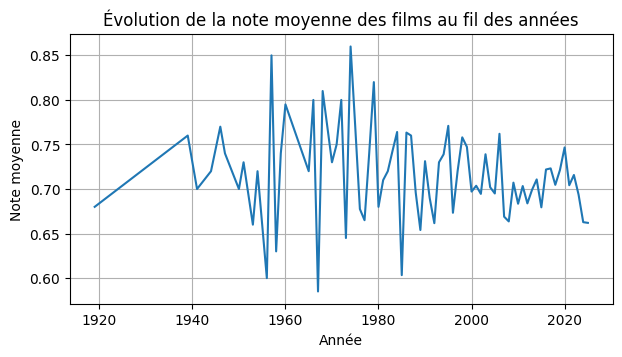

In [36]:
plt.figure(figsize=(7,3.5))
plt.plot(avg_rating_per_year["year"], avg_rating_per_year["rating"])
plt.xlabel("Année")
plt.ylabel("Note moyenne")
plt.title("Évolution de la note moyenne des films au fil des années")
plt.grid(True)
#plt.savefig("Evolution_noteMoy_annee.png", dpi=300, bbox_inches='tight')
plt.show()

### Nombre de films produits par année


In [26]:
movies_per_year = (df.groupby("year").size().reset_index(name="movie_count").sort_values("year"))

In [27]:
movies_per_year.head()

,year,movie_count
0,1919,1
1,1939,1
2,1941,1
3,1944,1
4,1946,2


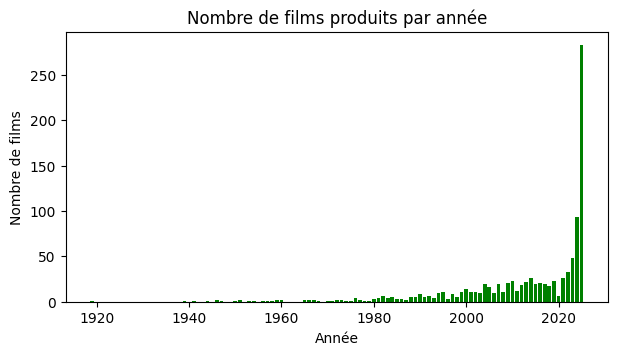

In [37]:
plt.figure(figsize=(7,3.5))
plt.bar(movies_per_year["year"], movies_per_year["movie_count"], color='green')
plt.xlabel("Année")
plt.ylabel("Nombre de films")
plt.title("Nombre de films produits par année")
#plt.savefig("Nombre_film_annee.png", dpi=300, bbox_inches='tight')
plt.show()

### Distribution des notes des films



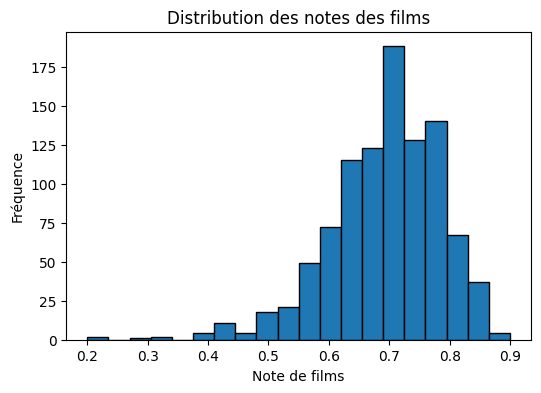

In [29]:
plt.figure(figsize=(6,4))
plt.hist(df["rating"], bins=20, edgecolor='black')
plt.xlabel("Note de films")
plt.ylabel("Fréquence")
plt.title("Distribution des notes des films")
#plt.savefig("histogramme_notes.png", dpi=300, bbox_inches='tight')
plt.show()

### Note moyenne des films par période


In [30]:
def period(year):
    if year < 1980:
        return "1919-1980"
    elif year < 1990:
        return "1980-1990"
    elif year < 2000:
        return "1990-2000"
    elif year < 2010:
        return "2000-2010"
    elif year < 2020:
        return "2010-2020"
    else:
        return "2020-2025"

df["period"] = df["year"].apply(period)

In [31]:
df[["year", "period"]].head(10)

,year,period
0,2025,2020-2025
1,2025,2020-2025
2,2025,2020-2025
3,2025,2020-2025
4,2025,2020-2025
5,2025,2020-2025
6,2025,2020-2025
7,2025,2020-2025
8,2025,2020-2025
9,2025,2020-2025


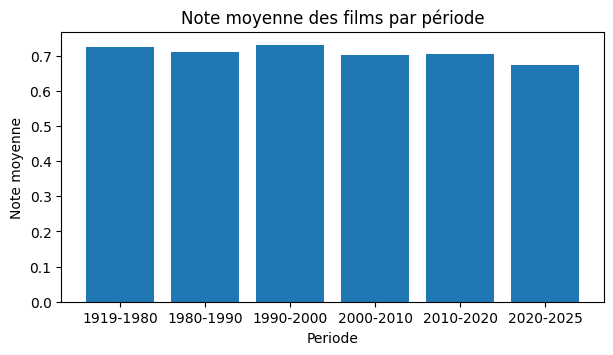

In [38]:
avg_rating_by_period = (df.groupby("period")["rating"].mean().reset_index())

plt.figure(figsize=(7,3.5))
plt.bar(avg_rating_by_period["period"], avg_rating_by_period["rating"])
plt.xlabel("Periode")
plt.ylabel("Note moyenne")
plt.title("Note moyenne des films par période")
#plt.savefig("NoteMoy_periode.png", dpi=300, bbox_inches='tight')
plt.show()

### Relation entre l’année de sortie et la note des films


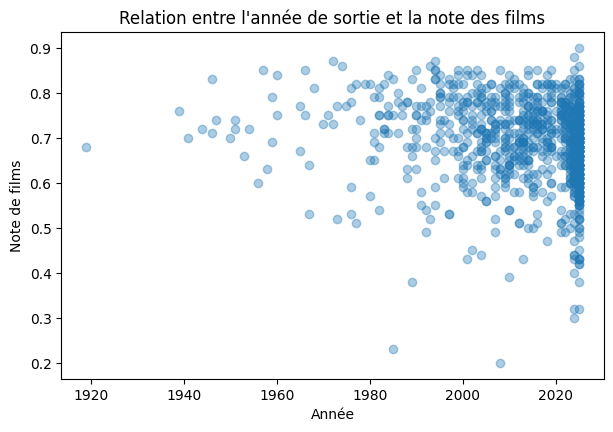

In [44]:
plt.figure(figsize=(7,4.5))
plt.scatter(df["year"], df["rating"], alpha=0.37)
plt.xlabel("Année")
plt.ylabel("Note de films")
plt.title("Relation entre l'année de sortie et la note des films")
#plt.savefig("Niage_annee_note.png", dpi=300, bbox_inches='tight')
plt.show()